In [1]:
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def HA(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all A bonds on the lattice
    
        HA1 = Bonds A: (4x+3, y+1) <--> (4x+4, y),  x' = 4x+3,   x = 4x + 4 
        HA2 = Bonds A: (4x+1, y) <--> (4x+2, y),  x' = 4x+1,   x = 4x + 2
        HA = HA1 + HA2"""
        
    #creates an array with all values of the lattice sites that construct the A bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(3, 4 * n, 4)  # 4x + 3
    B = np.arange(4, 4 * n + 1, 4)  # 4x + 4
    C = np.arange(1, 4 * n, 4)  # 4x + 1
    D = np.arange(2, 4 * n + 1, 4)  # 4x + 2


    HA1 = np.zeros((Lx, Lx), dtype=complex)
    HA2 = np.zeros((Lx, Lx), dtype=complex)

    HA1[A - 1, B - 1] = np.exp(1j * ky)
    HA1[B - 1, A - 1] = np.exp(-1j * ky)
    HA2[C - 1, D - 1] = 1
    HA2[D - 1, C - 1] = 1
    HA = HA1 + HA2
    return HA


def HB(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all B bonds on the lattice
    
        HB1 = Bonds B: (4x+2, y+1) <--> (4x+1, y), x' = 4x + 2,   x = 4x + 1 
        HB2 = Bonds B: (4x+3, y) <--> (4x+4, y), x' = 4x + 3,   x = 4x + 4
        HB = HB1 + HB2 """

    #creates an array with all values of the lattice sites that construct the B bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(2, 4 * n, 4)  # 4x + 2
    B = np.arange(1, 4 * n, 4)  # 4x + 1
    C = np.arange(3, 4 * n, 4)  # 4x + 3
    D = np.arange(4, 4 * n + 1, 4)  # 4x + 4

    HB1 = np.zeros((Lx, Lx), dtype=complex)
    HB2 = np.zeros((Lx, Lx), dtype=complex)

    HB1[A - 1, B - 1] = np.exp(1j * ky)
    HB1[B - 1, A - 1] = np.exp(-1j * ky)
    HB2[C - 1, D - 1] = 1
    HB2[D - 1, C - 1] = 1

    HB = HB1 + HB2

    return HB


def HC(n, Lx):
    
    """ This function constructs the full Hamiltonian for all C bonds on the lattice
    
        HC1 = Bonds C: (4x, y) <--> (4x+1, y ), x' = 4x,   x = 4x + 1
        HC2 = Bonds C: (4x+2, y) <--> (4x+3, y), x' = 4x + 2,   x = 4x + 3
        HC = HC1 + HC2  """

    #creates an array with all values of the lattice sites that construct the C bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(4, 4 * n, 4)  # 4x
    B = np.arange(5, 4 * n + 1, 4)  # 4x + 1
    C = np.arange(2, 4 * n , 4)  # 4x + 2
    D = np.arange(3, 4 * n , 4)  # 4x + 3

    HC1 = np.zeros((Lx, Lx), dtype=complex)
    HC2 = np.zeros((Lx, Lx), dtype=complex)
  
    HC1[A - 1, B - 1] = 1
    HC1[B - 1, A - 1] = 1
    HC2[C - 1, D - 1] = 1
    HC2[D - 1, C - 1] = 1

    HC = (HC1 + HC2) 

    return HC

In [3]:
def floquet_operator(n, Lx, ky, t,noise):
    """ This function constructs the full Floquet operator for the lattice """
    
    HA1 = HA(n, Lx, ky)
    HB1 = HB(n, Lx, ky)
    HC1 = HC(n, Lx)
    
    #creates the full Floquet operator
    Floquet = np.exp(-1j*t*(1 + noise[0][0])*HA1/3)@np.exp(-1j*t*(1 + noise[0][1])*HB1/3)@np.exp(-1j*t*(1 + noise[0][2])*HC1/3)
    
    return Floquet

In [4]:
def U(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H1 = - J * HA(n, Lx, ky) - Jprime * (HB(n, Lx, ky) + HC(n, Lx))
    H2 = - J * HB(n, Lx, ky) - Jprime * (HA(n, Lx, ky) + HC(n, Lx))
    H3 = - J * HC(n, Lx) - Jprime * (HA(n, Lx, ky) + HB(n, Lx, ky))

    (E1,V1)=np.linalg.eigh(H1)

    (E2,V2)=np.linalg.eigh(H2)

    (E3,V3)=np.linalg.eigh(H3)


    U_m = (V3 @ np.diag(np.exp(-1j*E3*(T*(1 + noise[0][0])/3))) @ V3.conj().T) @ (V2 @ np.diag(np.exp(-1j*E2*(T*(1 + noise[0][1])/3))) @ V2.conj().T) @ (V1 @ np.diag(np.exp(-1j*E1*(T*(1 + noise[0][2])/3))) @ V1.conj().T)
    #fix the loop such that the ky must be same.
    return U_m

In [5]:
def adjoint(psi):
    return psi.conjugate().transpose()
def psi_to_rho(psi):
    return numpy.outer(psi,psi.conjugate())
def exp_val(psi, op):
    return numpy.real(numpy.dot(adjoint(psi),op.dot(psi)))
def norm_sq(psi):
    return numpy.real(numpy.dot(adjoint(psi),psi))
def normalize(psi,tol=1e-9):
    ns=norm_sq(psi)**0.5
    if ns < tol:
        raise ValueError
    return psi/ns
def is_herm(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M-adjoint(M)
    return max(numpy.abs(diff.flatten())) < tol
def is_unitary(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M.dot(adjoint(M))-numpy.identity((M.shape[0]))
    return max(numpy.abs(diff.flatten())) < tol
def eigu(U,tol=1e-9):
    (E_1,V_1)=numpy.linalg.eigh(U+adjoint(U))
    U_1=adjoint(V_1).dot(U).dot(V_1)
    H_1=adjoint(V_1).dot(U+adjoint(U)).dot(V_1)
    non_diag_lst=[]
    j=0
    while j < U_1.shape[0]:
        k=0
        while k < U_1.shape[0]:
            if j!=k and abs(U_1[j,k]) > tol:
                if j not in non_diag_lst:
                    non_diag_lst.append(j)
                if k not in non_diag_lst:
                    non_diag_lst.append(k)
            k+=1
        j+=1
    if len(non_diag_lst) > 0:
        non_diag_lst=numpy.sort(numpy.array(non_diag_lst))
        U_1_cut=U_1[non_diag_lst,:][:,non_diag_lst]
        (E_2_cut,V_2_cut)=numpy.linalg.eigh(1.j*(U_1_cut-adjoint(U_1_cut)))
        V_2=numpy.identity((U.shape[0]),dtype=V_2_cut.dtype)
        for j in range(len(non_diag_lst)):
            V_2[non_diag_lst[j],non_diag_lst]=V_2_cut[j,:]
        V_1=V_1.dot(V_2)
        U_1=adjoint(V_2).dot(U_1).dot(V_2)
    # Sort by phase
    U_1=numpy.diag(U_1)
    inds=numpy.argsort(numpy.imag(numpy.log(U_1)))
    return (U_1[inds],V_1[:,inds]) # = (U_d,V) s.t. U=V*U_d*V^\dagger

In [6]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52        # Number of lattice sites along the y direction   
J = 1       # Hopping coefficient 
Jprime =0.10      # Number of lattice sites along the y direction
T_A  = 3*np.pi/2 
W = 0.0
omegaA = (2*np.pi)/T_A 

In [7]:
#---------------------------- Calculating and Graphing the Quasienergy Spectrum---------------------------------#

# Momentum space to calculate the quasienergy for the anomalous and haldane 
ky_list = np.linspace(-np.pi, np.pi, 100)

# Lists which will hold the values for the anomalous phase during the loop
quasienergies_listA  = [] 
eigenfunctions_listA= []

# Lists which will hold the values for the Haldane phase during the loop
quasienergies_listH  = [] 
eigenfunctions_listH= []
random = np.random.uniform(-W,W,(1,3))
# Calculates the quasienergy for period T with values ky 
for ky in ky_list:
    # Anomalous 
    lamdaA, V = eigu(U(n,Lx,T_A,ky,random))# within some ky pass the same noise realisation.
    quasienergies_listA.append(-np.log(lamdaA)*(-1j/T_A))
    eigenfunctions_listA.append(V)
    

# Anomalous
quasienergiesA = np.asanyarray(quasienergies_listA)
eigenfunctionsA = np.asanyarray(eigenfunctions_listA)


#-------------------------------------------- Time Evolution to Visualize Particle Edge Motion ------------------------------------------#

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_2338/1705239712.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_2338/1705239712.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.141592653589793, 3.141592653589793)

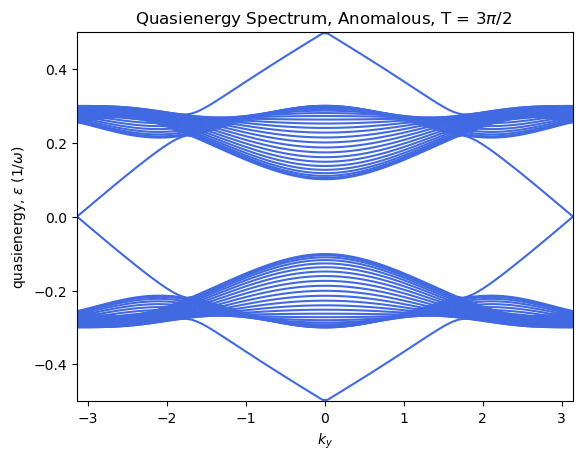

In [8]:
# Plots the graph quasienergy vs ky at total period T for the anomalous phase
plt.figure()
plt.plot(ky_list,quasienergiesA/omegaA,  color = 'royalblue')
plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
plt.xlabel('$k_y$')
plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
plt.ylim(-0.5,0.5)
plt.xlim(-np.pi,np.pi)

[[0.00506738 0.00582539 0.00976421 ... 0.00976421 0.00582539 0.00506738]
 [0.06247336 0.00595208 0.12114369 ... 0.12114369 0.00595208 0.06247336]
 [0.06247336 0.00595208 0.12114369 ... 0.12114369 0.00595208 0.06247336]
 ...
 [0.06247336 0.00595208 0.12114369 ... 0.12114369 0.00595208 0.06247336]
 [0.06247336 0.00595208 0.12114369 ... 0.12114369 0.00595208 0.06247336]
 [0.00506738 0.00582539 0.00976421 ... 0.00976421 0.00582539 0.00506738]]
[9.93342598e-01 5.28978932e-02 5.28978932e-02 6.17522336e-02
 6.17522336e-02 3.17747024e-03 3.17747024e-03 3.67912086e-03
 3.67912086e-03 1.89323119e-04 1.89323119e-04 2.19219842e-04
 2.19219842e-04 1.12807852e-05 1.12807852e-05 1.30621745e-05
 1.30621745e-05 6.72163541e-07 6.72163541e-07 7.78307299e-07
 7.78307299e-07 4.00507427e-08 4.00507427e-08 4.63752993e-08
 4.63752993e-08 2.38641627e-09 2.38641627e-09 2.76326378e-09
 2.76326377e-09 1.42194210e-10 1.42194214e-10 1.64648543e-10
 1.64648539e-10 8.47261922e-12 8.47262041e-12 9.81049454e-12
 9.8104

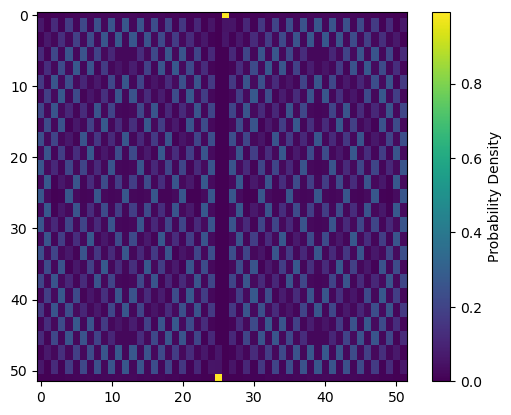

In [9]:
plt.imshow(np.abs(eigenfunctionsA[99]))
plt.colorbar(label='Probability Density')
print(np.abs(eigenfunctionsA[99]))
print(np.abs(np.transpose(eigenfunctionsA[99])[:][26]))

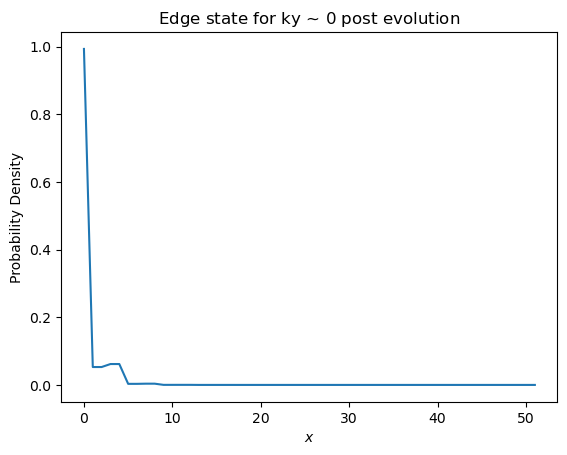

In [10]:
#plt.imshow(np.abs(eigenfunctionsA[99]))
plt.plot(np.arange(52),np.abs(np.transpose(eigenfunctionsA[99])[:][26]), label = 'ky = 0')
plt.title(label = 'Edge state for ky ~ ${0}$ post evolution ' )
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.show()

In [19]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52
J = 1       # Hopping coefficient 
Jprime =0.10        # Hopping coefficent 
m = 50      # Multiples of T
W = 0.2    # Noise strength
# Variables for anomalous 
T_A  = 3*np.pi/2         # Driving period 
t_A = np.arange(0 ,m*T_A, T_A)      # Mutlples of driving period for 
omegaA = (2*np.pi)/T_A 

In [20]:
ky_list = np.linspace(-np.pi, np.pi, 100)
GA = np.zeros((len(t_A), Lx, Lx), dtype = complex)
ky = 3
for step in range(0, len(t_A)):
    random = np.random.uniform(-W,W,(1,3))
    if step == 0:
        GA[step,:,:] = U(n, Lx, T_A, ky_list[99],random)
    else:
        GA[step,:,:] = U(n, Lx,  (t_A[step] - t_A[step-1]), ky_list[99],random) @ GA[step - 1,:,:]


In [21]:
finalwave_function = GA[-1,:,:] @ np.transpose(eigenfunctionsA[99])[:][26]

Text(0, 0.5, 'Probability Density')

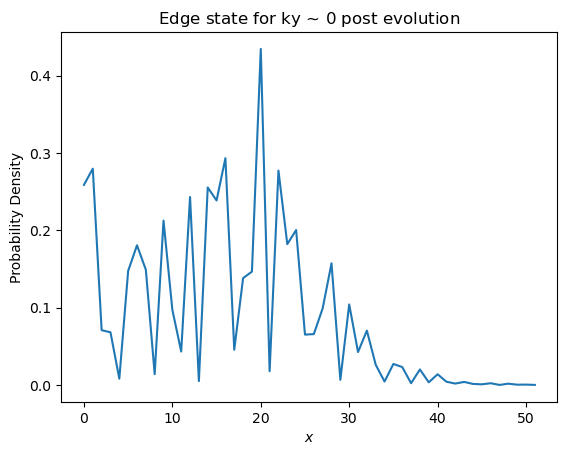

In [22]:
plt.plot(np.arange(52),np.abs(finalwave_function), label = 'ky = 0')
plt.title(label = 'Edge state for ky ~ ${0}$ post evolution ' )
plt.xlabel('$x$')
plt.ylabel('Probability Density')

In [94]:
edge_state_prob = []
for i in range(0,100):
    edge_state_prob.append(np.sum(np.abs(eigenfunctionsA[i,:, 0])))

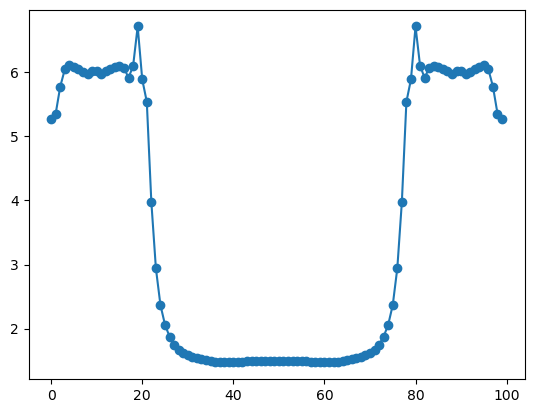

In [95]:
plt.plot(range(100), edge_state_prob,'-o')
plt.show()

In [88]:
edge_state_prob = []
for i in range(0,100):
    edge_state_prob.append(np.sum(np.abs(eigenfunctionsA[i, :, 20:30])))

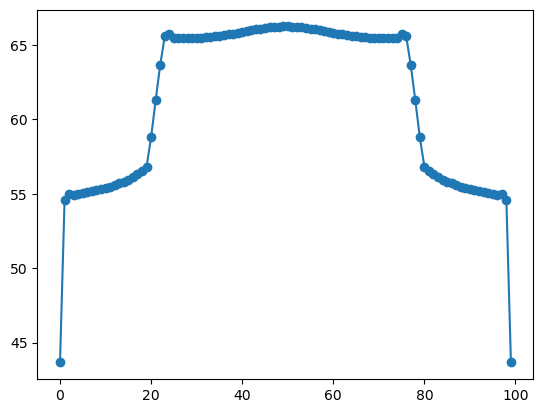

In [89]:
plt.plot(range(100), edge_state_prob,'-o')
plt.show()

In [97]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 50   
J = 1       # Hopping coefficient 
Jprime =0.10      # Number of lattice sites along the y direction
T_A  = 3*np.pi/6 
W = 0.0
omegaA = (2*np.pi)/T_A 

In [98]:
#---------------------------- Calculating and Graphing the Quasienergy Spectrum---------------------------------#

# Momentum space to calculate the quasienergy for the anomalous and haldane 
ky_list = np.linspace(-np.pi, np.pi, 100)

# Lists which will hold the values for the anomalous phase during the loop
quasienergies_listA  = [] 
eigenfunctions_listA= []

# Lists which will hold the values for the Haldane phase during the loop
quasienergies_listH  = [] 
eigenfunctions_listH= []
random = np.random.uniform(-W,W,(1,3))
# Calculates the quasienergy for period T with values ky 
for ky in ky_list:
    # Anomalous 
    lamdaA, V = eigu(U(n,Lx,T_A,ky,random))# within some ky pass the same noise realisation.
    quasienergies_listA.append(-np.log(lamdaA)*(-1j/T_A))
    eigenfunctions_listA.append(V)
    

# Anomalous
quasienergiesA = np.asanyarray(quasienergies_listA)
eigenfunctionsA = np.asanyarray(eigenfunctions_listA)


#-------------------------------------------- Time Evolution to Visualize Particle Edge Motion ------------------------------------------#

(-3.141592653589793, 3.141592653589793)

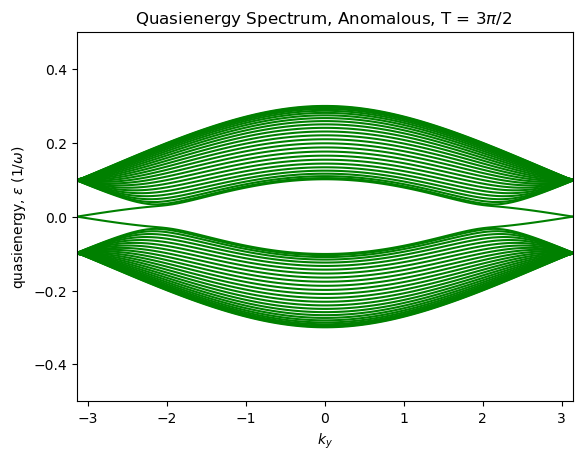

In [99]:
# Plots the graph quasienergy vs ky at total period T for the anomalous phase
plt.figure()
plt.plot(ky_list,quasienergiesA/omegaA,  color = 'green')
plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
plt.xlabel('$k_y$')
plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
plt.ylim(-0.5,0.5)
plt.xlim(-np.pi,np.pi)

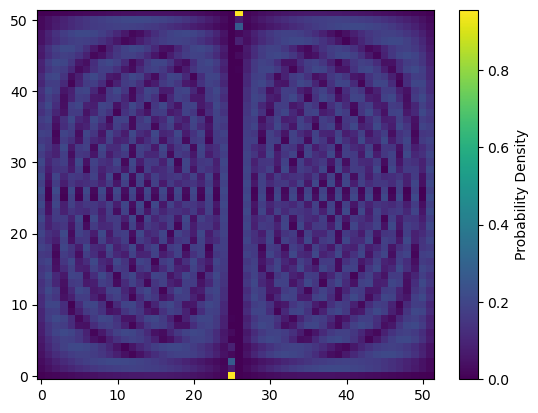

In [106]:
plt.imshow(np.abs(eigenfunctionsA[5]),  origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')

In [109]:
edge_state_prob = []
for i in range(0,100):
    edge_state_prob.append(np.sum(np.abs(eigenfunctionsA[i,:, 0]) + np.abs(eigenfunctionsA[i,:, 50])))

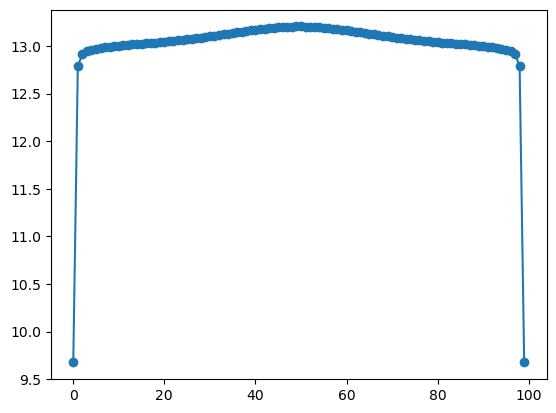

In [110]:
plt.plot(range(100), edge_state_prob,'-o')
plt.show()

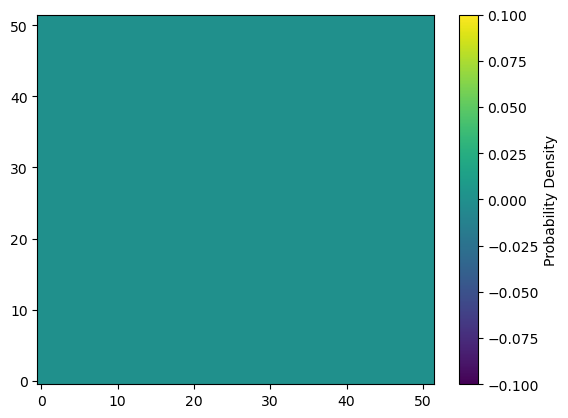

In [37]:
plt.imshow(np.abs(eigenvector[25, :, :]), origin='lower', aspect='auto')
plt.colorbar(label='Probability Density')